# Plot for Summary Report: Cows Milked Per Month

In [1]:
%run 'helpers-for-report-plot-generation.ipynb'

In [2]:
def get_milk():
    milk = get_dataset('milk_volume').set_index('date')['2016-01-01':'2017-12-31']
    count = milk.count()['animal_id'] * 2 # Each animal is milked twice daily
    print(f"An estimated total of {count} milkings occured in 2016 and 2017")
    return milk

milk = get_milk()

An estimated total of 208938 milkings occured in 2016 and 2017


In [3]:
def plot_unique_cows_milked_by_month(milk, start='2016-01-01', end='2017-12-31'):
    milk['animal_count'] = milk.groupby('date')['animal_id'].nunique()
    milk = milk[start:end].resample('M').mean()['animal_count'].reset_index()
    
    milk = milk[milk['animal_count'] > 75]
    milk['formated_date'] = milk['date'].dt.strftime('%b %Y')
    
    minimum = milk['animal_count'].min()
    maximum = milk['animal_count'].max()
    
    fig, ax = plt.subplots(figsize=(15, 5))
    ax = sns.pointplot(x='formated_date', y='animal_count', data=milk)
    count_min = ax.axhline(minimum, ls='--', c='red')
    count_max = ax.axhline(maximum, ls='--', c='green')
    _ = plt.ylabel('Animal Count', size=12)
    _ = plt.xlabel('Month', size=12)
    _ = plt.xticks(rotation='65')
    _ = plt.title('Cows Milked Per Month, Average Count', size=16)
    _ = plt.legend([count_min, count_max], 
                   [f'Min: {round(minimum, 2)}', f'Max: {round(maximum, 2)}'], 
                   loc='center')
    save_plot_for_summary_report('count-cows-milked-per-month.png')
    return ax

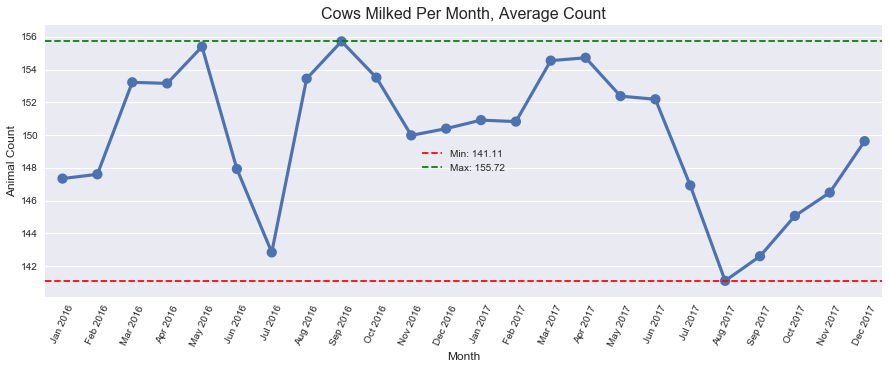

In [4]:
plot_unique_cows_milked_by_month(milk)
plt.show()